In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [9]:
dataset = pd.read_csv( "C:\\Users\\Ashin Mathew\\Music\\2\\Weather-Prediction-using-Regression-main\\bengaluru.csv", index_col="date_time")
display(dataset)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,18,11,2,91,0.0,1014,14,10,109,8
2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,17,9,2,93,0.0,1014,14,7,85,6
2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,16,7,2,94,0.0,1014,13,5,61,4
2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,15,5,2,96,0.0,1014,12,2,37,3
2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,06:42 AM,...,18,5,1,88,0.0,1015,14,5,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,06:41 AM,...,23,22,74,76,0.1,1014,23,10,107,16
2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,06:41 AM,...,22,23,73,81,0.6,1015,22,9,106,16
2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,06:41 AM,...,21,25,72,86,0.8,1016,21,9,105,17


In [10]:
dataset.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,29.646093,19.336735,0.0,10.653484,5.900448,4.013751,46.094077,16.085418,25.002261,25.269662,24.422152,17.370966,34.847488,64.895460,0.077719,1010.554225,23.979810,9.274162,176.182097,12.448938
std,3.446427,2.773771,0.0,1.986738,0.851346,2.869923,31.249725,4.161604,4.586926,4.430811,4.516766,7.426413,28.391021,21.856869,0.385865,3.187016,4.540028,2.184726,89.443207,5.716769
min,18.000000,11.000000,0.0,4.200000,4.000000,1.000000,0.000000,-9.000000,12.000000,13.000000,12.000000,0.000000,0.000000,6.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,18.000000,0.0,8.800000,5.000000,1.000000,18.000000,14.000000,21.000000,22.000000,21.000000,12.000000,9.000000,49.000000,0.000000,1008.000000,21.000000,10.000000,94.000000,8.000000
50%,29.000000,20.000000,0.0,11.600000,6.000000,5.000000,46.000000,18.000000,25.000000,25.000000,24.000000,17.000000,29.000000,68.000000,0.000000,1010.000000,23.000000,10.000000,163.000000,12.000000
75%,32.000000,21.000000,0.0,11.600000,6.000000,7.000000,73.000000,19.000000,28.000000,28.000000,27.000000,22.000000,54.000000,83.000000,0.000000,1013.000000,27.000000,10.000000,262.000000,16.000000
max,40.000000,28.000000,0.0,12.900000,8.000000,10.000000,100.000000,25.000000,43.000000,43.000000,42.000000,53.000000,100.000000,100.000000,16.900000,1021.000000,40.000000,20.000000,360.000000,41.000000


In [11]:
core_weather= dataset[["maxtempC","mintempC","sunHour","moon_illumination","DewPointC","FeelsLikeC","WindGustKmph","cloudcover","humidity","precipMM","pressure","tempC","visibility","winddirDegree","windspeedKmph"]].copy()

In [12]:
dataset.apply(pd.isnull).sum()/dataset.shape[0]

maxtempC             0.0
mintempC             0.0
totalSnow_cm         0.0
sunHour              0.0
uvIndex              0.0
uvIndex.1            0.0
moon_illumination    0.0
moonrise             0.0
moonset              0.0
sunrise              0.0
sunset               0.0
DewPointC            0.0
FeelsLikeC           0.0
HeatIndexC           0.0
WindChillC           0.0
WindGustKmph         0.0
cloudcover           0.0
humidity             0.0
precipMM             0.0
pressure             0.0
tempC                0.0
visibility           0.0
winddirDegree        0.0
windspeedKmph        0.0
dtype: float64

In [13]:
core_weather

,maxtempC,mintempC,sunHour,moon_illumination,DewPointC,FeelsLikeC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,
2009-01-01 00:00:00,27,12,11.6,31,16,18,11,2,91,0.0,1014,14,10,109,8
2009-01-01 01:00:00,27,12,11.6,31,16,17,9,2,93,0.0,1014,14,7,85,6
2009-01-01 02:00:00,27,12,11.6,31,15,16,7,2,94,0.0,1014,13,5,61,4
2009-01-01 03:00:00,27,12,11.6,31,15,15,5,2,96,0.0,1014,12,2,37,3
2009-01-01 04:00:00,27,12,11.6,31,15,18,5,1,88,0.0,1015,14,5,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 19:00:00,26,18,8.7,37,18,25,22,74,76,0.1,1014,23,10,107,16
2020-01-01 20:00:00,26,18,8.7,37,18,22,23,73,81,0.6,1015,22,9,106,16
2020-01-01 21:00:00,26,18,8.7,37,18,21,25,72,86,0.8,1016,21,9,105,17


In [14]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

maxtempC             0.0
mintempC             0.0
sunHour              0.0
moon_illumination    0.0
DewPointC            0.0
FeelsLikeC           0.0
WindGustKmph         0.0
cloudcover           0.0
humidity             0.0
precipMM             0.0
pressure             0.0
tempC                0.0
visibility           0.0
winddirDegree        0.0
windspeedKmph        0.0
dtype: float64

In [15]:
core_weather["precipMM"].value_counts()

0.0     84604
0.1      3677
0.2      1750
0.3      1069
0.4       848
        ...  
12.7        1
10.1        1
7.5         1
16.9        1
6.9         1
Name: precipMM, Length: 87, dtype: int64

In [16]:
core_weather["precipMM"]=core_weather["precipMM"].fillna(0)


In [17]:
core_weather[pd.isnull(core_weather["maxtempC"])]

,maxtempC,mintempC,sunHour,moon_illumination,DewPointC,FeelsLikeC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,


In [18]:
core_weather=core_weather.fillna(method="ffill")

In [19]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

maxtempC             0.0
mintempC             0.0
sunHour              0.0
moon_illumination    0.0
DewPointC            0.0
FeelsLikeC           0.0
WindGustKmph         0.0
cloudcover           0.0
humidity             0.0
precipMM             0.0
pressure             0.0
tempC                0.0
visibility           0.0
winddirDegree        0.0
windspeedKmph        0.0
dtype: float64

In [20]:
core_weather.dtypes

maxtempC               int64
mintempC               int64
sunHour              float64
moon_illumination      int64
DewPointC              int64
FeelsLikeC             int64
WindGustKmph           int64
cloudcover             int64
humidity               int64
precipMM             float64
pressure               int64
tempC                  int64
visibility             int64
winddirDegree          int64
windspeedKmph          int64
dtype: object

In [21]:
core_weather.index

Index(['2009-01-01 00:00:00', '2009-01-01 01:00:00', '2009-01-01 02:00:00',
       '2009-01-01 03:00:00', '2009-01-01 04:00:00', '2009-01-01 05:00:00',
       '2009-01-01 06:00:00', '2009-01-01 07:00:00', '2009-01-01 08:00:00',
       '2009-01-01 09:00:00',
       ...
       '2020-01-01 14:00:00', '2020-01-01 15:00:00', '2020-01-01 16:00:00',
       '2020-01-01 17:00:00', '2020-01-01 18:00:00', '2020-01-01 19:00:00',
       '2020-01-01 20:00:00', '2020-01-01 21:00:00', '2020-01-01 22:00:00',
       '2020-01-01 23:00:00'],
      dtype='object', name='date_time', length=96432)

<Axes: xlabel='date_time'>

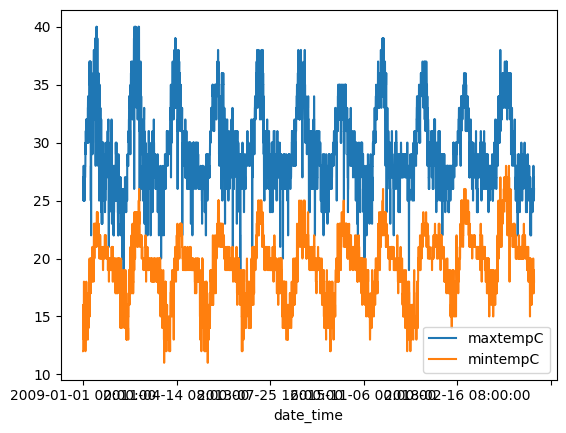

In [22]:
core_weather[["maxtempC","mintempC"]].plot()

In [23]:
core_weather["target"]=core_weather.shift(-1)["maxtempC"]

In [24]:
core_weather

,maxtempC,mintempC,sunHour,moon_illumination,DewPointC,FeelsLikeC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,target
date_time,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,27,12,11.6,31,16,18,11,2,91,0.0,1014,14,10,109,8,27.0
2009-01-01 01:00:00,27,12,11.6,31,16,17,9,2,93,0.0,1014,14,7,85,6,27.0
2009-01-01 02:00:00,27,12,11.6,31,15,16,7,2,94,0.0,1014,13,5,61,4,27.0
2009-01-01 03:00:00,27,12,11.6,31,15,15,5,2,96,0.0,1014,12,2,37,3,27.0
2009-01-01 04:00:00,27,12,11.6,31,15,18,5,1,88,0.0,1015,14,5,45,3,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 19:00:00,26,18,8.7,37,18,25,22,74,76,0.1,1014,23,10,107,16,26.0
2020-01-01 20:00:00,26,18,8.7,37,18,22,23,73,81,0.6,1015,22,9,106,16,26.0
2020-01-01 21:00:00,26,18,8.7,37,18,21,25,72,86,0.8,1016,21,9,105,17,26.0


In [25]:
core_weather=core_weather.iloc[:-1,:].copy()

In [26]:
core_weather

,maxtempC,mintempC,sunHour,moon_illumination,DewPointC,FeelsLikeC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,target
date_time,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,27,12,11.6,31,16,18,11,2,91,0.0,1014,14,10,109,8,27.0
2009-01-01 01:00:00,27,12,11.6,31,16,17,9,2,93,0.0,1014,14,7,85,6,27.0
2009-01-01 02:00:00,27,12,11.6,31,15,16,7,2,94,0.0,1014,13,5,61,4,27.0
2009-01-01 03:00:00,27,12,11.6,31,15,15,5,2,96,0.0,1014,12,2,37,3,27.0
2009-01-01 04:00:00,27,12,11.6,31,15,18,5,1,88,0.0,1015,14,5,45,3,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 18:00:00,26,18,8.7,37,18,25,20,74,72,0.3,1014,23,10,108,15,26.0
2020-01-01 19:00:00,26,18,8.7,37,18,25,22,74,76,0.1,1014,23,10,107,16,26.0
2020-01-01 20:00:00,26,18,8.7,37,18,22,23,73,81,0.6,1015,22,9,106,16,26.0


In [27]:
from sklearn.linear_model import Ridge
reg=Ridge(alpha=.1)

In [28]:
predictors=["maxtempC","mintempC","precipMM"]

In [29]:
train = core_weather.loc[:"2018-12-31"]


In [30]:
test = core_weather.loc["2019-01-01":]

In [31]:
train

,maxtempC,mintempC,sunHour,moon_illumination,DewPointC,FeelsLikeC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,target
date_time,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,27,12,11.6,31,16,18,11,2,91,0.0,1014,14,10,109,8,27.0
2009-01-01 01:00:00,27,12,11.6,31,16,17,9,2,93,0.0,1014,14,7,85,6,27.0
2009-01-01 02:00:00,27,12,11.6,31,15,16,7,2,94,0.0,1014,13,5,61,4,27.0
2009-01-01 03:00:00,27,12,11.6,31,15,15,5,2,96,0.0,1014,12,2,37,3,27.0
2009-01-01 04:00:00,27,12,11.6,31,15,18,5,1,88,0.0,1015,14,5,45,3,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-30 19:00:00,26,17,11.6,40,12,20,20,16,61,0.0,1018,20,10,71,13,26.0
2018-12-30 20:00:00,26,17,11.6,40,13,19,19,17,67,0.0,1018,19,10,76,13,26.0
2018-12-30 21:00:00,26,17,11.6,40,14,19,18,17,74,0.0,1018,18,10,82,13,26.0


In [32]:
test

,maxtempC,mintempC,sunHour,moon_illumination,DewPointC,FeelsLikeC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,target
date_time,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,26,16,11.6,26,14,18,15,1,74,0.0,1019,18,10,86,12,26.0
2019-01-01 01:00:00,26,16,11.6,26,14,18,15,1,78,0.0,1019,18,10,86,12,26.0
2019-01-01 02:00:00,26,16,11.6,26,14,17,14,2,82,0.0,1019,17,10,87,11,26.0
2019-01-01 03:00:00,26,16,11.6,26,14,17,13,3,85,0.0,1019,17,10,87,10,26.0
2019-01-01 04:00:00,26,16,11.6,26,14,17,13,3,83,0.0,1019,17,10,84,10,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01 18:00:00,26,18,8.7,37,18,25,20,74,72,0.3,1014,23,10,108,15,26.0
2020-01-01 19:00:00,26,18,8.7,37,18,25,22,74,76,0.1,1014,23,10,107,16,26.0
2020-01-01 20:00:00,26,18,8.7,37,18,22,23,73,81,0.6,1015,22,9,106,16,26.0


In [33]:
train[predictors]

,maxtempC,mintempC,precipMM
date_time,,,
2009-01-01 00:00:00,27,12,0.0
2009-01-01 01:00:00,27,12,0.0
2009-01-01 02:00:00,27,12,0.0
2009-01-01 03:00:00,27,12,0.0
2009-01-01 04:00:00,27,12,0.0
...,...,...,...
2018-12-30 19:00:00,26,17,0.0
2018-12-30 20:00:00,26,17,0.0
2018-12-30 21:00:00,26,17,0.0


In [34]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [35]:
predictions = reg.predict(test[predictors])

In [36]:
predictions


array([26.01654402, 26.01654402, 26.01654402, ..., 25.99885345,
       25.9902601 , 26.0074468 ])

In [37]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

0.08652462762434551

In [38]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [39]:
combined

,actual,predictions
date_time,,
2019-01-01 00:00:00,26.0,26.016544
2019-01-01 01:00:00,26.0,26.016544
2019-01-01 02:00:00,26.0,26.016544
2019-01-01 03:00:00,26.0,26.016544
2019-01-01 04:00:00,26.0,26.016544
...,...,...
2020-01-01 18:00:00,26.0,26.011743
2020-01-01 19:00:00,26.0,26.020337
2020-01-01 20:00:00,26.0,25.998853


<Axes: xlabel='date_time'>

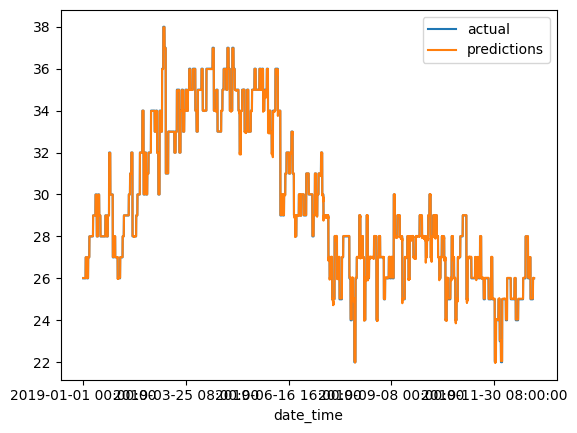

In [40]:
combined.plot()

In [41]:

reg.coef_

array([ 0.99273192,  0.00404474, -0.04296674])

In [42]:
core_weather["month_max"] = core_weather["maxtempC"].rolling(30).mean()

core_weather["month_day_max"] = core_weather["maxtempC"] / core_weather["maxtempC"]

core_weather["max_min"] = core_weather["maxtempC"] / core_weather["maxtempC"]

In [43]:
core_weather = core_weather.iloc[30:,:].copy()

In [44]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2018-12-31"]
    test = core_weather.loc["2019-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [45]:
predictors = ["maxtempC","mintempC","precipMM", "month_day_max", "max_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

0.08652460881949658

<Axes: xlabel='date_time'>

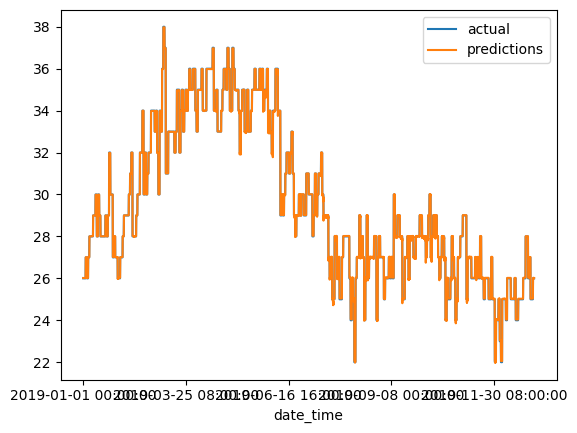

In [46]:
combined.plot()

In [47]:
core_weather.corr()["target"]

maxtempC             0.994717
mintempC             0.479480
sunHour              0.591747
moon_illumination   -0.015562
DewPointC           -0.272982
FeelsLikeC           0.550696
WindGustKmph        -0.283267
cloudcover          -0.492670
humidity            -0.547397
precipMM            -0.077225
pressure            -0.213592
tempC                0.540381
visibility           0.249570
winddirDegree        0.070324
windspeedKmph       -0.236879
target               1.000000
month_max            0.945387
month_day_max             NaN
max_min                   NaN
Name: target, dtype: float64

In [48]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [49]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
date_time,,,
2019-03-08 23:00:00,31.0,36.977051,5.977051
2019-06-09 23:00:00,29.0,33.990763,4.990763
2019-11-07 23:00:00,25.0,29.014966,4.014966
2019-08-26 23:00:00,24.0,28.013891,4.013891
2019-02-09 23:00:00,28.0,31.997207,3.997207
2019-02-18 23:00:00,30.0,33.994810,3.994810
2019-03-03 23:00:00,34.0,30.007697,3.992303
2019-09-09 23:00:00,30.0,26.032725,3.967275
2019-08-09 23:00:00,26.0,22.065845,3.934155


In [50]:
import pickle

In [51]:
pickle.dump(reg.fit,open('model.pkl','wb'))

In [52]:
model=pickle.load(open('model.pkl','rb'))